In [1]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
with open("database.json", "r") as f:
    dataset = json.load(f)

def convert_lists_to_np(obj):
    if isinstance(obj, list):
        if all(isinstance(x, (int, float)) for x in obj):
            return np.array(obj)
        else:
            return [convert_lists_to_np(x) for x in obj]
    elif isinstance(obj, dict):
        return {k: convert_lists_to_np(v) for k, v in obj.items()}
    else:
        return obj

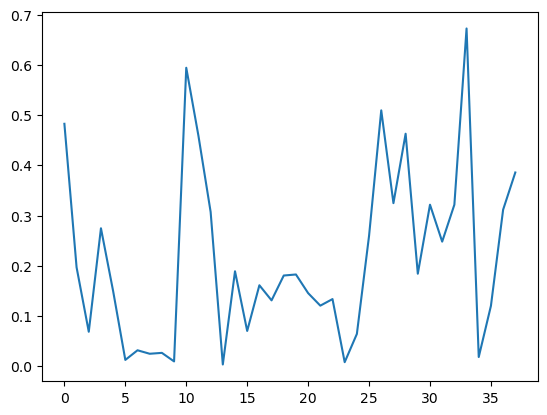

In [7]:
values = dataset["angle_0_TC_1"]["14.0000000-30.0000000"]["cl"]
result = []
for idx, value in enumerate(values):
    if idx == 0:
        continue
    r = abs(float(value) - float(values[idx-1]))
    result.append(r)
plt.plot(result)
#plt.plot(values)

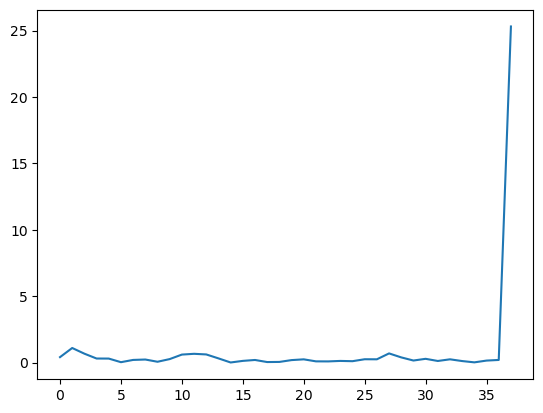

In [8]:
values = dataset["angle_0_TC_1"]["13.0000000-30.0000000"]["cl"]
result = []
for idx, value in enumerate(values):
    if idx == 0:
        continue
    r = abs(float(value) - float(values[idx-1]))
    result.append(r)
plt.plot(result)
#plt.plot(values)

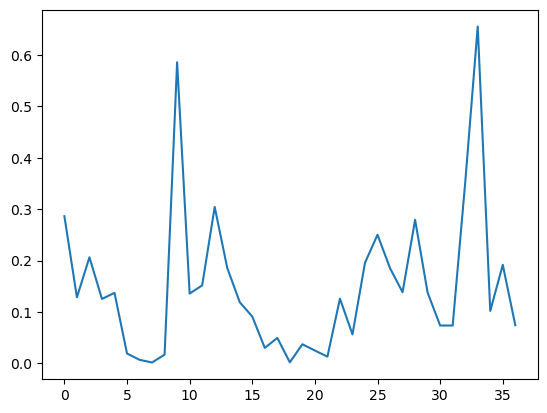

In [11]:
values = dataset["angle_0_TC_1"]["14.0000000-30.0000000"]["cl"]
def cal_delta(values):
    result = []
    for idx, value in enumerate(values):
        if idx == 0:
            continue
        r = abs(float(value) - float(values[idx-1]))
        result.append(r)
    return result
d1 = cal_delta(values)
d2 = cal_delta(d1)
plt.plot(d2)

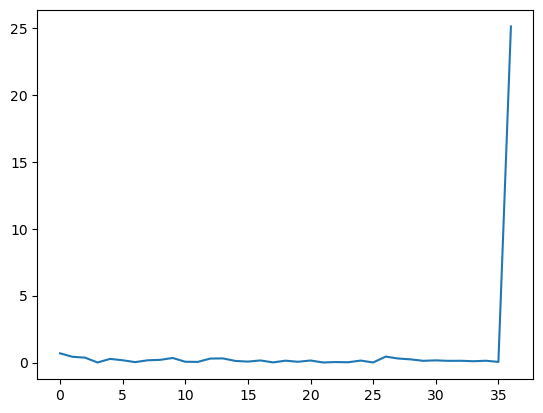

In [12]:
values = dataset["angle_0_TC_1"]["13.0000000-30.0000000"]["cl"]
def cal_delta(values):
    result = []
    for idx, value in enumerate(values):
        if idx == 0:
            continue
        r = abs(float(value) - float(values[idx-1]))
        result.append(r)
    return result
d1 = cal_delta(values)
d2 = cal_delta(d1)
plt.plot(d2)

0.9148783189470198


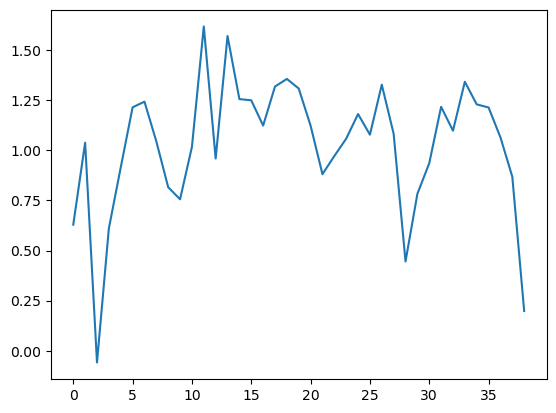

In [21]:
def hampel_filter(y, window_size=7, n_sigmas=3.0, strategy="winsor"):
    """
    y: array-like (série vs itération pour un alpha fixé)
    strategy: "winsor" (clipse à m ± T) ou "median" (remplace par m)
    """
    y = np.asarray(y, dtype=float).copy()
    n = len(y)
    half = window_size // 2
    y_corr = y.copy()

    for i in range(n):
        # indices de fenêtre [i-half, i+half], tronquée aux bords
        lo = max(0, i - half)
        hi = min(n, i + half + 1)
        window = y[lo:hi]
        med = np.median(window)
        mad = np.median(np.abs(window - med))

        # seuil local (si MAD=0, protège pour éviter division par 0)
        T = n_sigmas * 1.4826 * (mad if mad > 0 else 1e-12)

        if abs(y[i] - med) > T:
            if strategy == "winsor":
                y_corr[i] = med + np.sign(y[i] - med) * T
            else:  # "median"
                y_corr[i] = med
    return y_corr


values = dataset["angle_0_TC_1"]["13.0000000-30.0000000"]["cl"]
result = []
for idx, value in enumerate(values):
    if idx == 0:
        continue
    r = float(value) - float(values[idx-1])
    result.append(r)
y_h = hampel_filter(values)
K = 5
y_final = np.mean(y_h[-K:])
print(y_final)
plt.plot(y_h)
#plt.plot(result)


C:\Users\arthur\AppData\Local\Temp\ipykernel_23352\1716137.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


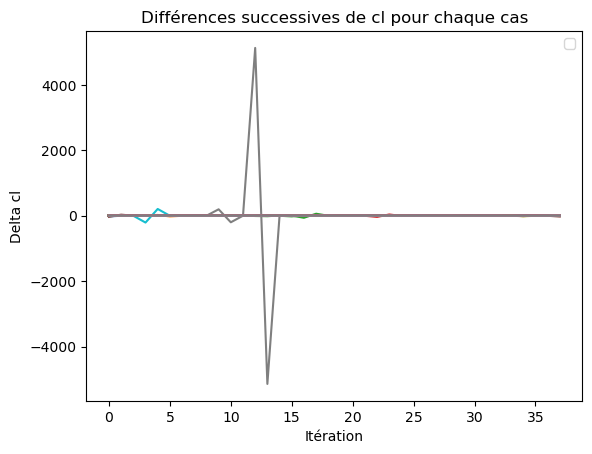

In [16]:
plt.figure()
for case_key, case_data in dataset["angle_0_TC_1"].items():
    if 'cl' in case_data and case_data['cl']:
        values = case_data['cl']
        result = []
        for idx, value in enumerate(values):
            if idx == 0:
                continue
            r = float(value) - float(values[idx-1])
            result.append(r)
        plt.plot(result)

plt.title("Différences successives de cl pour chaque cas")
plt.xlabel("Itération")
plt.ylabel("Delta cl")
plt.legend()
plt.show()